## Spam/Ham classifcation using NLP

In [ ]:
# the first cell includes the libraries we'll be using for making the model

In [ ]:
import nltk
import pandas as pd
import numpy as np

In [ ]:
msgs_dataset = pd.read_csv('SMSSpamCollection.tsv',sep ="\t",header = None)
msgs_dataset.columns = ['labels','body_text']
msgs_dataset.head()

,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
# now we'll preprocess the data provided to us which includes
#removing punctuations, tokenization,removing stopwords,
#lemmatizing and stemming

In [ ]:
# function made for removing punctuations
import string 

def no_punct(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation ])
    return txt_nopunct

msgs_dataset['body_text_clean'] = msgs_dataset['body_text'].apply(lambda x:no_punct(x))



In [ ]:
# function for tokenising the non punctuated texts
import re

def tokenise(txt):
    tokens = re.split('\W',txt)
    return tokens

msgs_dataset['body_text_tokenised'] = msgs_dataset['body_text_clean'].apply(lambda x:tokenise(x.lower()))



In [ ]:
# function that remove the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def remove_stopwords(tokenised_list):
    txt=[word for word in tokenised_list if word not in stopwords]
    return txt

msgs_dataset['body_text_nostopword']=msgs_dataset['body_text_tokenised'].apply(lambda x:remove_stopwords(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# function used for stemming 
ps = nltk.PorterStemmer()
def stemming(tokenised_txt):
    txt = [ps.stem(word) for word in tokenised_txt]
    return txt

msgs_dataset['body_text_stemmed'] = msgs_dataset['body_text_nostopword'].apply(lambda x: stemming(x))



In [ ]:
# function used for lemmatising
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatising(tokenised_txt):
    txt = [wn.lemmatize(word) for word in tokenised_txt]
    return txt

msgs_dataset['body_text_lemmatised'] = msgs_dataset['body_text_nostopword'].apply(lambda x:lemmatising(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# remove the sentence below from the comment box to see the output till now
# msgs_dataset.head()

In [ ]:
# now we have to vectorise the data

from sklearn.feature_extraction.text import CountVectorizer

def clean_txt(txt):
    txt = "".join([word.lower() for word in txt if word not in string.punctuation])
    tokens =re.split('\W',txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords]
    return txt

count_vect=CountVectorizer(analyzer=clean_txt)
X_count=count_vect.fit_transform(msgs_dataset['body_text'])

#smaller sample data is to be used

sample_data = msgs_dataset[0:20]
count_vect_sample =CountVectorizer(analyzer=clean_txt)
sample_x_count=count_vect_sample.fit_transform(sample_data['body_text'])
# print(sample_x_count.shape)

x_counts_df = pd.DataFrame(sample_x_count.toarray())
# x_counts_df

x_counts_df.columns = count_vect_sample.get_feature_names()
# x_counts_df


In [ ]:
# now we compute TF-IDF for th3 given data
# TF-IDF consists of 2 terms:
# TF- term frequency: which measures how frequently a term occurs in a document
# IDF- measures how important a term is

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(analyzer=clean_txt)
x_tfidf=tfidf_vect.fit_transform(msgs_dataset['body_text'])
# print(x_tfidf.shape)

# same for sample data
sample_data=msgs_dataset[0:20]

tfidf_vect_sample=TfidfVectorizer(analyzer=clean_txt)
x_tfidf_sample=tfidf_vect_sample.fit_transform(sample_data['body_text'])

#print(X_tfidf_sample.shape)

x_tfidf_df =pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
# x_tfidf_df

In [ ]:
# now we create a test model

In [ ]:
# as all features are represented as vectors now, we can train our spam/ham classifier
# we'lll use feature creation 

msgs_dataset= pd.read_csv('SMSSpamCollection.tsv', sep="\t",header=None)

msgs_dataset.columns=['label','body_text']
msgs_dataset["body_len"]= msgs_dataset["body_text"].apply(lambda x:len(x)-x.count(" "))

# the function below is created to count the punctuaion percentage in the message
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

msgs_dataset["punct%"]= msgs_dataset['body_text'].apply(lambda x:count_punct(x))


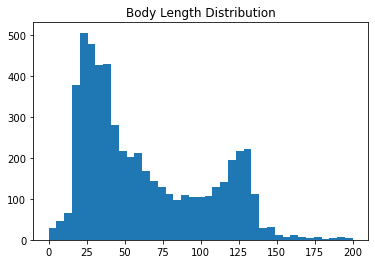

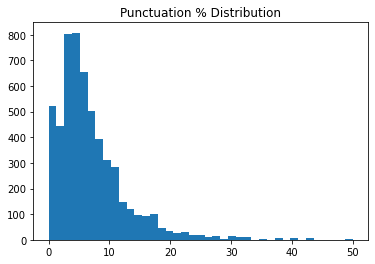

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(msgs_dataset['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

bins=np.linspace(0,50,40)

plt.hist(msgs_dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()